# VSCode, Copilot, Jupyter, Git, Mamba
### NYU[x] Research Tooling Meeting

Ellis Brown

10/09/2023



<br><br>

## 0. Why this matters?
---
Good tooling:
1. Accelerates experimentation
    - make more progress, faster
    - more robust code
2. Enables reproducibility
3. Facilitates collaboration

<br><br>

## 1. VSCode
---

Why I like it:
- Lightweight and fast
- Extensions / Plugins -> scales to power-use
  - Jupyter
  - Copilot
  - Git
  - Remote SSH
- Debugging
- Wide adoption / community / support

<br><br>

## 2. Jupyter
---
- interactive notebook + code execution
- great for experimentation, data exploration, and visualization
- lightweight way to test/develop your library code, interactively

<br>

### Jupyter + VSCode
- all of the features of the VSCode editor, ***native*** to the notebook experience 🔥
    - Copilot!
- compute clusters / HPC / Slurm:
    - can start a Jupyter server (e.g. in `tmux` session) <br>
      & connect to it

<br>

### Tip: extensions / "magic"
- autoreload: reloads imported modules before executing code
    - my default 1st cell in ~ every notebook:<br>
        ```python
        %load_ext autoreload
        %autoreload 2
        ```
- VSCode Jupyter plots matplotlib inline automatically :)

<br>

### Tip: naming notebooks
- organizing your notebooks by date is a great way to keep track of your work / progress
    - you will thank yourself later!
- e.g., I nest my notebooks in a `notebooks/` dir with the following naming convention:
    - `notebooks/YYYY-MM-DD-<name>.ipynb`

<br><br>

## 3. GitHub Copilot
---
- GPT-3 powered Code Autocompletion (on steroids)
- *potentially best application of current generations of LLMs?*

Oct 2021 beta — changed the way I approach coding

<br>

### 3.1 Code As "Context"
ChatGPT as a lens to understand Copilot
- context = prompt + history (in ChatGPT parlance)
- the better the context, the better the suggestions

***Copilot Context:*** code + comments
1. in ***current file***
    - especially current/previous line
    - "Fill-In-the-Middle" paradigm
        - code before & after the cursor
2. from ***neighboring tabs***
    - Copilot attends significantly more to code if it is open in a tab
3. from ***other files in the repo***, (but much less likely to be added to the context)
    - other files in the repo are scanned too, but much less likely to be added to the context
    
<br>

https://github.blog/2023-05-17-how-github-copilot-is-getting-better-at-understanding-your-code/

<br>

### 3.2 Examples / Use Cases

Shortcuts:
1. `tab` to accept suggestion
2. `opt+[`, `opt+]` to cycle through suggestions


#### 3.2.1 generic code completion

In [1]:
def sqrt(x):
    """
    Compute square roots using the method of Heron of Alexandria.

    Args:
        x: The number for which the square root is to be computed.
    """
    if x < 0:
        raise ValueError(
            "Cannot compute square root of "
            f"negative number {x}"
        )
    guess = x
    i = 0
    while guess * guess != x and i < 20:
        guess = (guess + x / guess) / 2.0
        i += 1
    return guess

#### 3.2.2 documentation
> add documentation to the `sqrt` function


In [2]:
def sqrt(x):
    """
    Compute square roots using the method of Heron of Alexandria.

    Args:
        x: The number for which the square root is to be computed.

    Returns:
        The square root of x.
    """
    if x < 0:
        raise ValueError(
            "Cannot compute square root of "
            f"negative number {x}"
        )
    guess = x
    i = 0
    while guess * guess != x and i < 20:
        guess = (guess + x / guess) / 2.0
        i += 1
    return guess

#### 3.2.3 test generation

In [3]:
# create a test for the sqrt function
def test_sqrt():
    assert sqrt(4) == 2
    assert sqrt(9) == 3
    assert sqrt(16) == 4

# run the test for the sqrt function
test_sqrt()

#### 3.2.4 inline Q/A with the LLM
> e.g., look up the args for the autoreload magic function

In [4]:
%load_ext autoreload
%autoreload 2 # Reload all local modules every time before executing the Python code typed.
# what does the 2 parameter mean?
# ans: 2 means always reload all modules (except those excluded by %aimport) before executing the Python code typed.

# list options
# 1. %autoreload 0 -> disable automatic reloading
# 2. %autoreload 1 -> Reload all modules imported with %aimport every time before executing the Python code typed.
# 3. %autoreload 2 -> Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.

UsageError: unrecognized arguments: # Reload all local modules every time before executing the Python code typed.


#### 3.2.5 data manipulation / visualization
> e.g., plot the distribution of the `iris` dataset

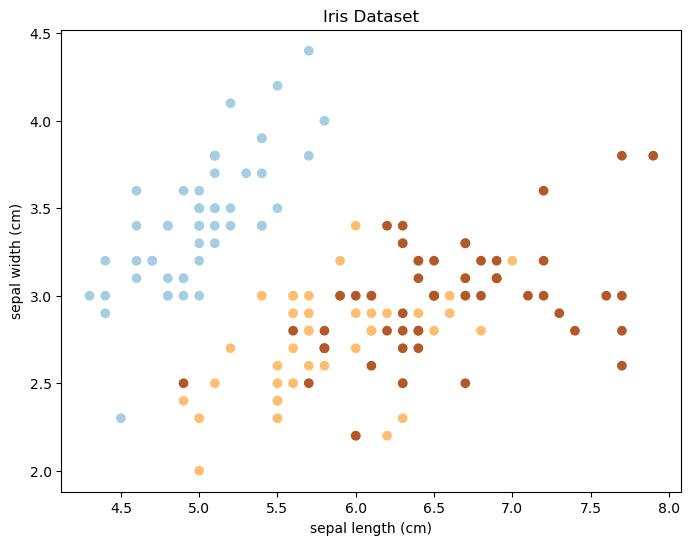

In [5]:
"""
Load the iris dataset, and plot the first two features in a scatter plot.
"""
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# make the plot smaller
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# add a title to the plot
plt.title('Iris Dataset')

# save the plot as a PDF
plt.savefig('iris-data.pdf')


#### 3.2.6 complex APIs
> e.g., regex

In [6]:
# write a regex to match all words surrounded by parentheses
pattern1 = r"\(.*?\)"

import re

# test code
print(re.findall(pattern1, '(I want to match this)'))
print(re.findall(pattern1, 'I want to (match) this'))
print(re.findall(pattern1, 'I want to (match) this and (this) and (this)'))

# (round 2) add examples where there are open / close parens w/ no matches
print(re.findall(pattern1, 'I want to (match this')) # no match, left paren not closed
print(re.findall(pattern1, 'I want to match this)')) # no match, right paren not opened
print(re.findall(pattern1, 'I want to match this')) # no match, no parens

# convert the above into a real test case
def test_parentheses():
    assert re.findall(pattern1, '(I want to match this)') == ['(I want to match this)']
    assert re.findall(pattern1, 'I want to (match) this') == ['(match)']
    assert re.findall(pattern1, 'I want to (match) this and (this) and (this)') == ['(match)', '(this)', '(this)']
    # (round 2 tests)
    assert re.findall(pattern1, 'I want to (match this') == []
    assert re.findall(pattern1, 'I want to match this)') == []
    assert re.findall(pattern1, 'I want to match this') == []
    print('Success!')

# run the test
test_parentheses()

['(I want to match this)']
['(match)']
['(match)', '(this)', '(this)']
[]
[]
[]
Success!


#### 3.2.7 quick 1-off bash script completion
> note: chatgpt is also great for this!

In [7]:
"""
colors: red green blue yellow orange purple brown black white
animals: dog cat horse pig cow sheep goat chicken


python path/to/your/script.py --color red --animal dog
python path/to/your/script.py --color green --animal cat
python path/to/your/script.py --color blue --animal horse
python path/to/your/script.py --color yellow --animal pig
python path/to/your/script.py --color orange --animal cow
python path/to/your/script.py --color purple --animal sheep
python path/to/your/script.py --color brown --animal goat

"""

'\ncolors: red green blue yellow orange purple brown black white\nanimals: dog cat horse pig cow sheep goat chicken\n\n\npython path/to/your/script.py --color red --animal dog\npython path/to/your/script.py --color green --animal cat\npython path/to/your/script.py --color blue --animal horse\npython path/to/your/script.py --color yellow --animal pig\npython path/to/your/script.py --color orange --animal cow\npython path/to/your/script.py --color purple --animal sheep\npython path/to/your/script.py --color brown --animal goat\n\n'

### 3.4 Copilot Best Practices
> stolen from here:
> https://github.blog/2023-06-20-how-to-write-better-prompts-for-github-copilot/#3-best-practices-for-prompt-crafting-with-github-copilot

#### 3.4.1. block comments to set the stage / give it a high-level goal
- top of file
- above a section

In [8]:
"""
Create a basic markdown editor in Next.js with the following features:
- Use react hooks
- Create state for markdown with default text "type markdown here"
- A text area where users can write markdown 
- Show a live preview of the markdown text as I type
- Support for basic markdown syntax like headers, bold, italics 
- Use React markdown npm package 
- The markdown text and resulting HTML should be saved in the component's state and updated in real time 
"""

'\nCreate a basic markdown editor in Next.js with the following features:\n- Use react hooks\n- Create state for markdown with default text "type markdown here"\n- A text area where users can write markdown \n- Show a live preview of the markdown text as I type\n- Support for basic markdown syntax like headers, bold, italics \n- Use React markdown npm package \n- The markdown text and resulting HTML should be saved in the component\'s state and updated in real time \n'

![copilot best practices](https://github.blog/wp-content/uploads/2023/06/245577032-c1ee10ef-3c24-458d-94af-8408484a1ee0.gif)

#### 3.4.2. inline comments to prompt for specific output
- articulate the logic / steps for it to follow
    - often will be able to auto-complete!
- start writing code to get more specific suggestions


> ***Let GitHub Copilot generate the code after each step***, rather than asking it to generate a bunch of code all at once.


<!-- display this gif: https://github.blog/wp-content/uploads/2023/06/245886121-885cc0ed-97c2-4b25-be74-02e7b34711a7.gif -->
<!-- ![](https://github.blog/wp-content/uploads/2023/06/245886121-885cc0ed-97c2-4b25-be74-02e7b34711a7.gif) -->
<!-- render the image using an <img> tag with a max width of 600 -->


<img src="https://github.blog/wp-content/uploads/2023/06/245886121-885cc0ed-97c2-4b25-be74-02e7b34711a7.gif" alt="copilot best practices" width="600"/>

> n.b., look into this cell's comments to see examples of me prompting Copilot to display the above gif :0

#### 3.4.3. provide examples
- think prompting!
- can provide examples in a comment prompt
    - paste in a desired output dict

In [9]:
# flatmap the data and return a list of names
data = [
    [
        { 'name': 'John', 'age': 25 },
        { 'name': 'Jane', 'age': 30 }
    ],
    [
        { 'name': 'Bob', 'age': 40 }
    ]
]
# expected output: 'John', 'Jane', 'Bob'

def get_names(data):
    return [person['name'] for group in data for person in group]

# test code
print(get_names(data))

# write a test case
def test_get_first_names():
    assert get_names(data) == ['John', 'Jane', 'Bob']
    print('Success!')

# run the test
test_get_first_names()

['John', 'Jane', 'Bob']
Success!


### 3.5. good coding practices 🤝 Copilot!

- descriptive variable names
- modularize code
- comment your code --> prompts!
- write docstrings (when appropriate)
    - Copilot is great for writing documentation!
    - but too much = hard to read code
- write **tests!**
    - Copilot makes this easier AND more essential

#### ***warning:*** *learn to question/inspect its suggestions*
- blindly accepting every suggestion = bugs!!!
    - especially if you don't understand what it's doing --> much harder to find :(

## 4. Mamba — drop-in replacement for Conda rewritten in C++ ⚡⚡
---

#### 4.1 `conda` vs. `pip`?
Conda
1. creates isolated, Python-version-specific envs
    - e.g., some old libs only work with 3.7
2. more flexible: manage Python & other dependencies together
    - e.g., `cudatoolkit`, `libopencv`, `ffmpeg`, ...
3. most portable / reproducible
    - want your project setup to be able to work on Linux/Mac/Windows etc. with different hardware
    - essential for collaboration
4. has `pip` integrated
    - can install `pip` packages in a `conda` env
    - but not vice versa

#### 4.2 Mamba 🐍
- always use `mamba` in place of `conda`

https://mamba.readthedocs.io/en/latest/index.html


#### 4.3 General tips:
- use your environment file `environment.yaml`
    - add new dependencies to the file as needed
    - prefer `conda` over `pip` dependencies when possible

<br>

- helpful aliases:
    ```bash
    # conda activate
    alias ca="conda activate"

    # create conda environment from file
    alias mcf="mamba env create --file"

    # update conda environment from file
    alias muf="mamba env update --file"
    ```
    
<br><br>

## 5. Git
---

> ***make life easier for your future self***

- prefer committing *too often* over not *often enough*
    - horror-stories: losing days/weeks of work
    - easier to find bugs on the git history
- take the 2 seconds to write descriptive commit messages
    - e.g., "updates" --> "fixes bug in `foo.py`"
- use branches for large changes
    - raise a Pull Request on GitHub to review all changes
    - can squash small commits to keep it clean

<br>

- `.gitignore`
    - toptal: top google result for "gitignore generator"
    - https://www.toptal.com/developers/gitignore?templates=linux,macos,python,jupyternotebooks,data

<br>

- VSCode Git plugin makes it easy!
    - can stage/unstage lines of code:
        - select lines of code
        - right click -> "Stage Selected Ranges"
        - right click -> "Unstage Selected Ranges"
    - useful, easy to forget git functions
        - undo last commit
        - commit staged (ammend) --> adds current staged changes to previous commit